In [1]:

using Pkg
Pkg.add(url="https://github.com/fkguo/IMinuit.jl")


    Updating `~/IMinuit.jl/docs/Project.toml`
  [beb75e20] - IMinuit v0.2.0 `~/IMinuit.jl`
    Updating `~/IMinuit.jl/docs/Manifest.toml`
  [861a8166] - Combinatorics v1.0.2
  [bbf7d656] - CommonSubexpressions v0.3.0
  [163ba53b] - DiffResults v1.1.0
  [b552c78f] - DiffRules v1.15.1
  [f6369f11] - ForwardDiff v0.10.35
  [beb75e20] - IMinuit v0.2.0 `~/IMinuit.jl`
  [1e83bf80] - StaticArraysCore v1.4.2
  [8ba89e20] - Distributed
   Resolving package versions...
    Updating `~/IMinuit.jl/docs/Project.toml`
  [beb75e20] + IMinuit v0.2.0 `~/IMinuit.jl`
    Updating `~/IMinuit.jl/docs/Manifest.toml`
  [861a8166] + Combinatorics v1.0.2
  [bbf7d656] + CommonSubexpressions v0.3.0
  [163ba53b] + DiffResults v1.1.0
  [b552c78f] + DiffRules v1.15.1
  [f6369f11] + ForwardDiff v0.10.35
  [beb75e20] + IMinuit v0.2.0 `~/IMinuit.jl`
  [1e83bf80] + StaticArraysCore v1.4.2
  [8ba89e20] + Distributed


In [2]:
using IMinuit
using BenchmarkTools

[ Info: Precompiling IMinuit [beb75e20-2205-47e6-ad51-640e9c2309f1]


initiated!!


In [3]:
f(x) = x[1]^2 + (x[2]-1)^2 + (x[3]-2)^4
f1(x, y, z) = x^2 + (y-1)^2 + (z-2)^4

f1 (generic function with 1 method)

In [4]:
# using array parameters
m = Minuit(f, [1, 1, 4], fix_x0 = true)
migrad(m)

PyObject <FMin algorithm='Migrad' edm=2.4670682282505703e-05 edm_goal=0.0002 errordef=1.0 fval=1.0000370129083695 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=True hesse_failed=False is_above_max_edm=False is_valid=True nfcn=45 ngrad=0 reduced_chi2=nan time=0.06921156900352798>
(Param(number=0, name='x0', value=1.0, error=0.01, merror=None, is_const=False, is_fixed=True, lower_limit=None, upper_limit=None), Param(number=1, name='x1', value=1.0, error=0.9999999999400042, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None), Param(number=2, name='x2', value=2.0779988685764814, error=5.233092083066116, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None))
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -1.21819202e-09]
 [ 0.00000000e+00 -1.21819202e-09  2.73852527e+01]]

In [5]:
# a new fit can continue from the previous fit
m_new = Minuit(f, m, fix_x0 = false)
migrad(m_new)

PyObject <FMin algorithm='Migrad' edm=4.854434939210982e-06 edm_goal=0.0002 errordef=1.0 fval=7.285091391992251e-06 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=True hesse_failed=False is_above_max_edm=False is_valid=True nfcn=40 ngrad=0 reduced_chi2=nan time=0.0003692239988595247>
(Param(number=0, name='x0', value=-9.230505249036014e-11, error=0.9999999999999991, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None), Param(number=1, name='x1', value=1.0, error=0.9999999999998908, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None), Param(number=2, name='x2', value=2.0519527751467623, error=7.854497166409804, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None))
[[1.00000000e+00 1.77634400e-15 4.95556534e-29]
 [1.77634400e-15 1.00000000e+00 2.78975543e-14]
 [4.95556534e-29 2.78975543e-14 6.16931257e+01]]

In [6]:
# using array parameters, using `ForwardDiff: gradient` to compute the gradient
gradf(x) = gradient(f, x)
mgrad = Minuit(f, [1, 1, 4], grad = gradf)
migrad(mgrad)

PyObject <FMin algorithm='Migrad' edm=0.0001147793195551524 edm_goal=0.0002 errordef=1.0 fval=0.0001683111301546357 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=True hesse_failed=False is_above_max_edm=False is_valid=True nfcn=59 ngrad=6 reduced_chi2=nan time=0.5728983890003292>
(Param(number=0, name='x0', value=0.0027789542449766086, error=0.9999999999999593, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None), Param(number=1, name='x1', value=1.0, error=1.0000000000000169, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None), Param(number=2, name='x2', value=2.1125715483995617, error=3.626492458643747, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None))
[[ 1.          0.          0.        ]
 [ 0.          1.          0.        ]
 [ 0.          0.         13.15144755]]

In [7]:
# parameters are given individually
m1 = Minuit(f1, x = 1, y = 1, z = 4)
migrad(m1)

PyObject <FMin algorithm='Migrad' edm=0.00011476370188508502 edm_goal=0.0002 errordef=1.0 fval=0.0001682888749907514 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=True hesse_failed=False is_above_max_edm=False is_valid=True nfcn=89 ngrad=0 reduced_chi2=nan time=0.09139553000568412>
(Param(number=0, name='x', value=0.002778199292675712, error=0.9999999999999966, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None), Param(number=1, name='y', value=1.0000000000000002, error=0.9999999999998966, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None), Param(number=2, name='z', value=2.112568383318672, error=3.626614534698427, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None))
[[ 1.          0.          0.        ]
 [ 0.          1.          0.        ]
 [ 0.          0.         13.15233298]]

In [8]:
@show iminuit.__version__
propertynames(m)

iminuit.__version__ = "2.18.0"


101-element Vector{Symbol}:
 :LEAST_SQUARES
 :LIKELIHOOD
 :__annotations__
 :__class__
 :__delattr__
 :__dir__
 :__doc__
 :__eq__
 :__format__
 :__ge__
 :__getattribute__
 :__gt__
 :__hash__
 ⋮
 :profile
 :reset
 :scan
 :scipy
 :simplex
 :strategy
 :throw_nan
 :tol
 :valid
 :values
 :var2pos
 :visualize

In [9]:
# the doc strings are from `iminuit`
@doc migrad

Docstring pulled from the Python `iminuit`:


        Run Migrad minimization.

        Migrad from the Minuit2 library is a robust minimisation algorithm which earned
        its reputation in 40+ years of almost exclusive usage in high-energy physics. How
        Migrad works is described in the `Minuit paper`_. It uses first and approximate
        second derivatives to achieve quadratic convergence near the minimum.

        Parameters
        ----------
        ncall :
            Approximate maximum number of calls before minimization will be aborted.
            If set to None, use the adaptive heuristic from the Minuit2 library
            (Default: None). Note: The limit may be slightly violated, because the
            condition is checked only after a full iteration of the algorithm, which
            usually performs several function calls.

        iterate :
            Automatically call Migrad up to N times if convergence was not reached
            (Default: 5). This si

## Example: Fit to the BES data of the π⁺π⁻ energy distribution of ψ'→J/ψπ⁺π⁻

The data are taken from [BES Collaboration, Phys. Rev. D 62 (2000) 032002](https://inspirehep.net/literature/507637).

Here we use a simple model, which is not meant to be the correct one, to fit to the data.

In [10]:
using CSV
using DataFrames
using Plots
pyplot(framestyle = :box, minorticks = 5)
using LaTeXStrings

[ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


In [11]:
data_df = DataFrame(CSV.File("./testdata.csv"))
const data = Data(data_df)

Data([0.303, 0.309, 0.321, 0.327, 0.333, 0.339, 0.345, 0.351, 0.357, 0.363  …  0.531, 0.537, 0.543, 0.549, 0.555, 0.561, 0.567, 0.573, 0.579, 0.585], [8.522656, 44.87459, 29.63286, 58.13258, 28.2143, 129.0572, 181.7821, 199.5301, 269.4043, 186.1139  …  5217.45, 5867.647, 5717.979, 5527.38, 5548.063, 5386.82, 5425.564, 4744.075, 3899.626, 2725.864], [14.44523, 78.24785, 23.01279, 28.29703, 14.79316, 35.48893, 43.7948, 42.20547, 49.41916, 42.54225  …  164.0276, 174.4779, 169.0323, 165.0818, 164.632, 160.1847, 160.5301, 149.5817, 138.9569, 117.8775], 47)

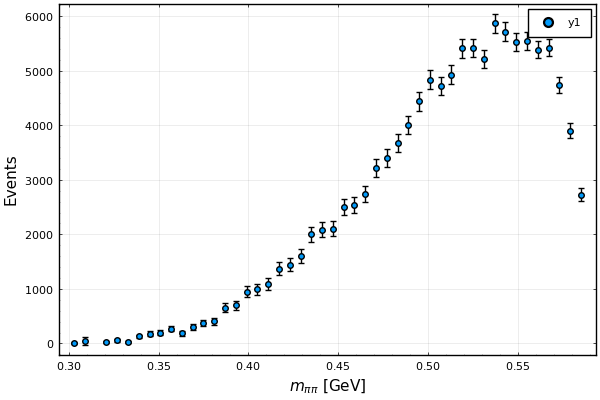

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [12]:
@plt_data data  xlab=L"m_{\pi\pi}"*" [GeV]"  ylab="Events"

In [13]:
const M = 3.686; const mπ = 0.14; const mJ = 3.097; 

λ(x, y, z) = x^2 + y^2 + z^2 - 2x*y - 2y*z - 2z*x

# a simple function that will be used to fit the data: QCD multipole expansion model for ψ'→J/ψπ⁺π⁻
# The important ππ FSI effect is not taken into account
# bg is just for introducing a third parameter
function dist(w, N, c, bg) 
    if (w ≤ 2mπ || w ≥ M-mJ)
        res = 0.0
    else
        q1 = sqrt(λ(w^2, mπ^2, mπ^2))/(2w)
        q2 = sqrt(λ(M^2, w^2, mJ^2))/(2M)
        res = N * q1 * q2 * (w^2 - c*mπ^2)^2 + bg
    end
    return res * 1e6
end;

dist(x, p) = dist(x, p...)

dist (generic function with 2 methods)

In [14]:
# parameters given individually
χsq1(N, c, bg) = chisq(dist, data, (N, c, bg));

# all parameters are vairables of χsq
fit1 = Minuit(χsq1, N = 1, c = 2, bg = 0, error_N = 0.1, error_c = 0.1, error_bg = 0.1)
fit1.strategy = 1;

In [15]:
# parameters are collected into a tuple or an array, which is the only variable of χsq
parname = [:N, :c, :bg]
χsq(par) = chisq(dist, data, par)
gradf(par) = gradient(χsq, par)
fit = Minuit(χsq, [1, 2, 0], error = 0.1*ones(3), name = parname, grad = gradf)
fit.strategy = 1;

# or simply using model_fit or @model_fit
fit2 = model_fit(dist, data, [1, 2, 0], error = 0.1*ones(3), name = parname, fix_bg = true)
fit2.strategy = 1;
migrad(fit2)

PyObject <FMin algorithm='Migrad' edm=6.14734842872889e-05 edm_goal=0.0002 errordef=1.0 fval=68.21841491568557 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=True hesse_failed=False is_above_max_edm=False is_valid=True nfcn=60 ngrad=0 reduced_chi2=nan time=0.023053808996337466>
(Param(number=0, name='N', value=2.6681960437143837, error=0.04224516409271021, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None), Param(number=1, name='c', value=4.326170735305057, error=0.061681228609901384, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None), Param(number=2, name='bg', value=0.0, error=0.1, merror=None, is_const=False, is_fixed=True, lower_limit=None, upper_limit=None))
[[0.00178465 0.00232812 0.        ]
 [0.00232812 0.00380457 0.        ]
 [0.         0.         0.        ]]

In [16]:
# the privous fit status can be passed to a new fit
fit2_new = model_fit(dist, data, fit2, name = parname, fix_bg = false)
migrad(fit2_new)

PyObject <FMin algorithm='Migrad' edm=2.0802796267468135e-05 edm_goal=0.0002 errordef=1.0 fval=64.67995814372355 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=True hesse_failed=False is_above_max_edm=False is_valid=True nfcn=65 ngrad=0 reduced_chi2=nan time=0.003583781006454956>
(Param(number=0, name='N', value=2.611694784029727, error=0.051774157148768825, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None), Param(number=1, name='c', value=4.201402659318696, error=0.09309868134226096, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None), Param(number=2, name='bg', value=-2.187403330680718e-05, error=1.1893819057631849e-05, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None))
[[2.68056335e-03 4.45952759e-03 3.72791883e-07]
 [4.45952759e-03 8.66736447e-03 8.28577808e-07]
 [3.72791883e-07 8.28577808e-07 1.41462932e-10]]

In [17]:
@btime migrad(fit)
minos(fit)
migrad(fit)

  215.846 μs (4818 allocations: 93.65 KiB)


PyObject <FMin algorithm='Migrad' edm=2.3431034956593366e-15 edm_goal=0.0002 errordef=1.0 fval=64.679937335079 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=True hesse_failed=False is_above_max_edm=False is_valid=True nfcn=399650 ngrad=11 reduced_chi2=nan time=-0.46897747596813133>
(Param(number=0, name='N', value=2.6114833251930683, error=0.051769909282983854, merror=(-0.051452580011336416, 0.052103853998085925), is_const=False, is_fixed=False, lower_limit=None, upper_limit=None), Param(number=1, name='c', value=4.20103135177359, error=0.09310452497041742, merror=(-0.093920672177343, 0.09232893054481826), is_const=False, is_fixed=False, lower_limit=None, upper_limit=None), Param(number=2, name='bg', value=-2.1921185530005688e-05, error=1.1895728032506308e-05, merror=(-1.2031491852718112e-05, 1.1765607898341513e-05), is_const=False, is_fixed=False, lower_limit=None, upper_limit=None))
<MErrors
  <MError number=0 name='N' lower=-0.051452580011336416 upper=0.052103853998085925 is_valid=True lower_valid=True upper_valid=True at_lower_limit=False at_upper_limit=False at_lower_max_fcn=False at_upper_max_fcn=False lower_new_min=False upper_new_min=False nfcn=56 min=2.6114833251930683>,
  <MError number=1 name='c' lower=-0.093920672177343 upper=0.09232893054481826 is_valid=True lower_valid=True upper_valid=True at_lower_limit=False at_upper_limit=False at_lower_max_fcn=False at_upper_max_fcn=False lower_new_min=False upper_new_min=False nfcn=56 min=4.20103135177359>,
  <MError number=2 name='bg' lower=-1.2031491852718112e-05 upper=1.1765607898341513e-05 is_valid=True lower_valid=True upper_valid=True at_lower_limit=False at_upper_limit=False at_lower_max_fcn=False at_upper_max_fcn=False lower_new_min=False upper_new_min=False nfcn=56 min=-2.1921185530005688e-05>
>
[[2.68012351e-03 4.45943061e-03 3.72863627e-07]
 [4.45943061e-03 8.66845257e-03 8.28851111e-07]
 [3.72863627e-07 8.28851111e-07 1.41508345e-10]]

In [18]:
@btime migrad(fit1)
minos(fit1)
migrad(fit1)

  136.016 μs (730 allocations: 19.93 KiB)


PyObject <FMin algorithm='Migrad' edm=1.5156345070287753e-14 edm_goal=0.0002 errordef=1.0 fval=64.679937335079 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=True hesse_failed=False is_above_max_edm=False is_valid=True nfcn=565652 ngrad=0 reduced_chi2=nan time=0.05349618034233572>
(Param(number=0, name='N', value=2.6114833211935484, error=0.051776712195704004, merror=(-0.05145257573454067, 0.05210385773044046), is_const=False, is_fixed=False, lower_limit=None, upper_limit=None), Param(number=1, name='c', value=4.201031344545451, error=0.09311685621270735, merror=(-0.09392066407552968, 0.09232893682255511), is_const=False, is_fixed=False, lower_limit=None, upper_limit=None), Param(number=2, name='bg', value=-2.192118618207932e-05, error=1.1895620973146581e-05, merror=(-1.2031491205034717e-05, 1.1765608570813917e-05), is_const=False, is_fixed=False, lower_limit=None, upper_limit=None))
<MErrors
  <MError number=0 name='N' lower=-0.05145257573454067 upper=0.05210385773044046 is_valid=True lower_valid=True upper_valid=True at_lower_limit=False at_upper_limit=False at_lower_max_fcn=False at_upper_max_fcn=False lower_new_min=False upper_new_min=False nfcn=56 min=2.6114833211935484>,
  <MError number=1 name='c' lower=-0.09392066407552968 upper=0.09232893682255511 is_valid=True lower_valid=True upper_valid=True at_lower_limit=False at_upper_limit=False at_lower_max_fcn=False at_upper_max_fcn=False lower_new_min=False upper_new_min=False nfcn=56 min=4.201031344545451>,
  <MError number=2 name='bg' lower=-1.2031491205034717e-05 upper=1.1765608570813917e-05 is_valid=True lower_valid=True upper_valid=True at_lower_limit=False at_upper_limit=False at_lower_max_fcn=False at_upper_max_fcn=False lower_new_min=False upper_new_min=False nfcn=56 min=-2.192118618207932e-05>
>
[[2.68082793e-03 4.46071705e-03 3.72952983e-07]
 [4.46071705e-03 8.67074891e-03 8.28986847e-07]
 [3.72952983e-07 8.28986847e-07 1.41505798e-10]]

In [19]:
minos(fit1)

PyObject <FMin algorithm='Migrad' edm=1.5156345070287753e-14 edm_goal=0.0002 errordef=1.0 fval=64.679937335079 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=True hesse_failed=False is_above_max_edm=False is_valid=True nfcn=565820 ngrad=0 reduced_chi2=nan time=-0.052184784348355606>
(Param(number=0, name='N', value=2.6114833211935484, error=0.051776712195704004, merror=(-0.05145257573454067, 0.05210385773044046), is_const=False, is_fixed=False, lower_limit=None, upper_limit=None), Param(number=1, name='c', value=4.201031344545451, error=0.09311685621270735, merror=(-0.09392066407552968, 0.09232893682255511), is_const=False, is_fixed=False, lower_limit=None, upper_limit=None), Param(number=2, name='bg', value=-2.192118618207932e-05, error=1.1895620973146581e-05, merror=(-1.2031491205034717e-05, 1.1765608570813917e-05), is_const=False, is_fixed=False, lower_limit=None, upper_limit=None))
<MErrors
  <MError number=0 name='N' lower=-0.05145257573454067 upper=0.05210385773044046 is_valid=True lower_valid=True upper_valid=True at_lower_limit=False at_upper_limit=False at_lower_max_fcn=False at_upper_max_fcn=False lower_new_min=False upper_new_min=False nfcn=56 min=2.6114833211935484>,
  <MError number=1 name='c' lower=-0.09392066407552968 upper=0.09232893682255511 is_valid=True lower_valid=True upper_valid=True at_lower_limit=False at_upper_limit=False at_lower_max_fcn=False at_upper_max_fcn=False lower_new_min=False upper_new_min=False nfcn=56 min=4.201031344545451>,
  <MError number=2 name='bg' lower=-1.2031491205034717e-05 upper=1.1765608570813917e-05 is_valid=True lower_valid=True upper_valid=True at_lower_limit=False at_upper_limit=False at_lower_max_fcn=False at_upper_max_fcn=False lower_new_min=False upper_new_min=False nfcn=56 min=-2.192118618207932e-05>
>
[[2.68082793e-03 4.46071705e-03 3.72952983e-07]
 [4.46071705e-03 8.67074891e-03 8.28986847e-07]
 [3.72952983e-07 8.28986847e-07 1.41505798e-10]]

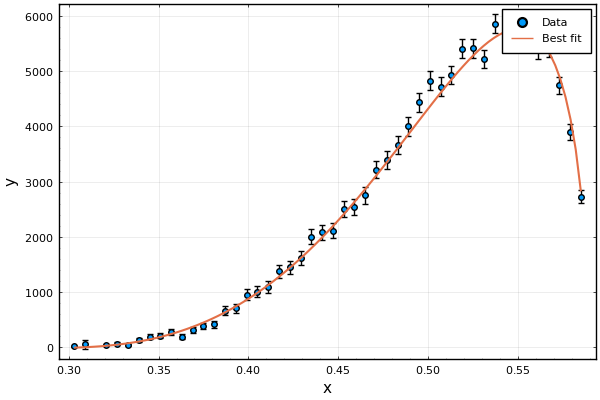

In [20]:
# the ordering of dist, fit and data does not matter
@plt_best dist fit data

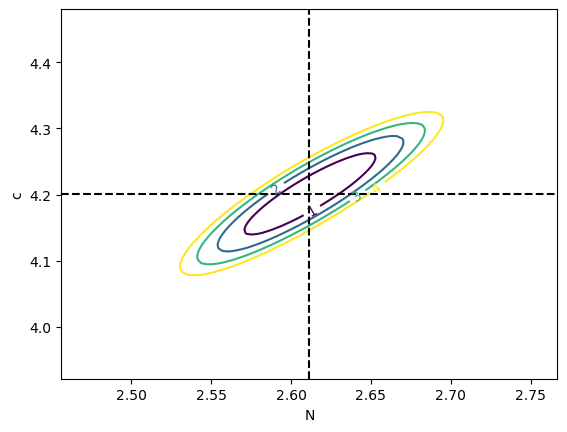

([2.4561531846064364, 2.4592911671637516, 2.4624291497210673, 2.4655671322783825, 2.4687051148356978, 2.4718430973930134, 2.4749810799503287, 2.4781190625076444, 2.4812570450649596, 2.484395027622275  …  2.738571614764822, 2.7417095973221373, 2.7448475798794525, 2.747985562436768, 2.7511235449940834, 2.7542615275513986, 2.7573995101087143, 2.7605374926660295, 2.7636754752233452, 2.7668134577806605], [3.9216807759073293, 3.9273242217384023, 3.932967667569476, 3.938611113400549, 3.944254559231622, 3.9498980050626953, 3.9555414508937683, 3.9611848967248418, 3.9668283425559148, 3.972471788386988  …  4.429590900703915, 4.435234346534989, 4.440877792366061, 4.446521238197135, 4.452164684028208, 4.457808129859281, 4.463451575690354, 4.469095021521428, 4.4747384673525, 4.480381913183574], [20.970459755972996 20.02080897997878 … 290.2779850474049 296.35529928065046; 21.146256518693036 20.129488037901638 … 285.04032680263396 291.0733880873432; … ; 350.8704215520153 342.54385622437354 … 19.824213

In [21]:
# MIGRAD contour of two parameters with the other ones fixed
# needs PyPlot or the pyplot backend of Plots
draw_contour(fit1,:N, :c, bound=3, bins=100)

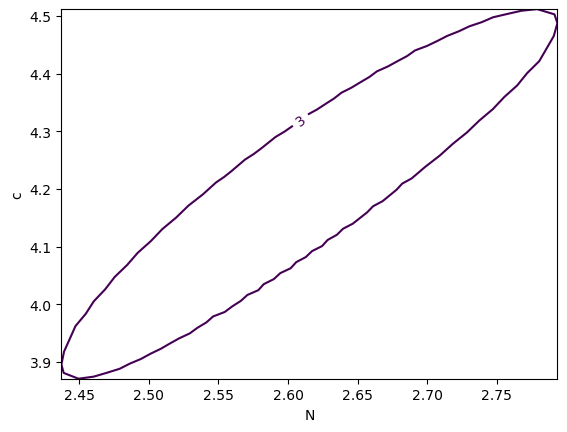

PyObject <matplotlib.contour.ContourSet object at 0x7f14bf5f5c60>

In [22]:
# contour of parameter space from MINOS
draw_mncontour(fit1,:N, :c, nsigma=3, numpoints=100)

In [23]:
matrix(fit1, correlation = true)

3×3 Matrix{Float64}:
 1.0       0.925213  0.605526
 0.925213  1.0       0.748397
 0.605526  0.748397  1.0

In [24]:
@show fit1.matrix
matrix(fit1)

fit1.matrix = [0.0026808279257967637 0.004460717050849894 3.729529830296808e-7; 0.004460717050849894 0.008670748910938015 8.289868474538332e-7; 3.729529830296808e-7 8.289868474538332e-7 1.4150579833676482e-10]


3×3 Matrix{Float64}:
 0.00268083  0.00446072  3.72953e-7
 0.00446072  0.00867075  8.28987e-7
 3.72953e-7  8.28987e-7  1.41506e-10

In [25]:
# this gives parameter sets at the 1σ boundary
@time contour_df(fit1, χsq1, npts = 5)

  1.702498 seconds (3.74 M allocations: 246.451 MiB, 5.41% gc time, 97.76% compilation time)


Row,chisq,N,c,bg
,Float64,Float64,Float64,Float64
1,64.6799,2.61148,4.20103,-2.19212e-5
2,65.6799,2.56003,4.11414,-2.93031e-5
3,65.6799,2.66359,4.28643,-1.48855e-5
4,65.68,2.56385,4.10711,-3.10184e-5
5,65.6799,2.65961,4.29336,-1.32339e-5
6,65.68,2.5798,4.13027,-3.39527e-5
7,65.68,2.64221,4.2688,-1.01556e-5
8,65.7184,2.56003,4.10711,-3.0459e-5
9,65.7184,2.56003,4.10711,-3.0459e-5


In [26]:
# random sampling of parameters in given ranges, keeping those within 1σ
@time parsam_df = contour_df_samples(fit1, χsq1, (:N, :c), ([2.5,2.8], [4.0,4.3]), nsamples = 3000)

  2.307346 seconds (6.62 M allocations: 264.082 MiB, 5.05% gc time, 27.12% compilation time)


Row,chisq,N,c,bg
,Float64,Float64,Float64,Float64
1,64.6799,2.61148,4.20103,-2.19212e-5
2,65.3583,2.65105,4.27719,-1.47288e-5
3,64.7453,2.62234,4.21387,-2.12807e-5
4,64.8934,2.59253,4.15935,-2.62679e-5
5,64.8994,2.60053,4.19757,-2.09793e-5
6,64.8844,2.59933,4.16706,-2.5927e-5
7,65.2471,2.64545,4.24388,-1.94565e-5
8,65.542,2.58823,4.19096,-2.03662e-5
9,64.7453,2.62474,4.22317,-2.00633e-5


In [27]:
# get parameter ranges
extrema(parsam_df.:N), extrema(parsam_df.:c)

((2.566922307435812, 2.660053351117039), (4.115238412804268, 4.2888962987662556))

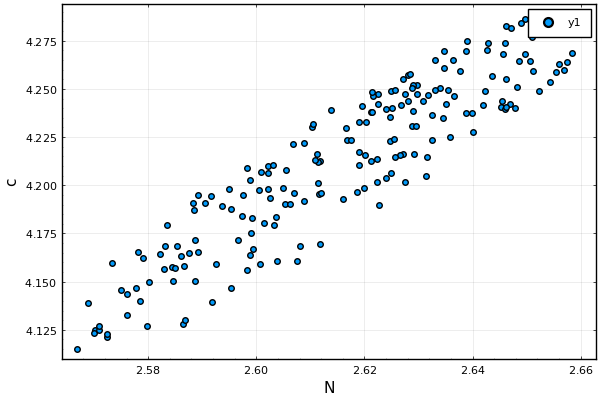

In [28]:
scatter(parsam_df.:N, parsam_df.:c, xlab = "N", ylab = "c")

In [29]:
@time contour_df_samples(fit, χsq, (:x0, :x1, :x2), ([2.5,2.8],  [4.0,4.3], (-3e-5,3e-5)), nsamples = 1000)

  0.983029 seconds (1.82 M allocations: 98.122 MiB, 4.15% gc time, 74.24% compilation time)


Row,chisq,N,c,bg
,Float64,Float64,Float64,Float64
1,64.6799,2.61148,4.20103,-2.19212e-5
2,64.9362,2.60601,4.20901,-2.06306e-5
3,65.671,2.62162,4.2006,-1.71471e-5
4,65.137,2.5979,4.19099,-1.79279e-5
5,65.094,2.6006,4.19159,-1.78679e-5
6,65.3406,2.63333,4.26126,-1.40841e-5
7,65.1599,2.5988,4.15856,-2.54955e-5


In [30]:
@time contour_df_samples(fit, χsq, :x0, (2.5,2.8), nsamples = 20)

  0.153705 seconds (550.96 k allocations: 18.102 MiB, 87.97% compilation time)


Row,chisq,N,c,bg
,Float64,Float64,Float64,Float64
1,64.6799,2.61148,4.20103,-2.19212e-5
2,65.5614,2.56316,4.11968,-2.88302e-5
3,65.0779,2.57895,4.14646,-2.65198e-5
4,64.785,2.59474,4.17304,-2.42721e-5
5,64.6803,2.61053,4.19944,-2.20544e-5
6,64.7617,2.62632,4.2256,-1.98768e-5
7,65.0271,2.64211,4.2515,-1.77407e-5
8,65.4744,2.65789,4.27721,-1.56345e-5


## Example A in the iminuit tutorial

The example is [Example A: Fit of a gaussian model to a histogram](https://nbviewer.jupyter.org/github/scikit-hep/iminuit/blob/master/tutorial/automatic_differentiation.ipynb)

In [31]:
using PyCall

In [32]:
# import numpy from Python to generate the same data as in the example
np = pyimport(:numpy)
default_rng = pyimport("numpy.random").default_rng
rng = default_rng(seed=1)
const w, xe = np.histogram(rng.normal(0, 1, 10000), bins=1000)

([1, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [-3.8378621427178974, -3.830092502694802, -3.8223228626717063, -3.8145532226486107, -3.806783582625515, -3.7990139426024196, -3.791244302579324, -3.7834746625562286, -3.775705022533133, -3.7679353825100375  …  3.8618511201697956, 3.869620760192891, 3.8773904002159867, 3.8851600402390822, 3.892929680262178, 3.9006993202852733, 3.908468960308369, 3.9162386003314644, 3.92400824035456, 3.931777880377655])

In [33]:
# define the model and the score function to minimize
using SpecialFunctions

function cdf(x, par)
    mu, sigma = par
    z = (x - mu) / sigma
    return 0.5 * (1 + erf(z / sqrt(2))) 
end

function score(par)
    amp = par[1]
    rest = par[2:end]
    mu = amp * (cdf.(xe[2:end], Ref(rest)) - cdf.(xe[1:end-1], Ref(rest)) )
    return 2 * sum(@. mu - w * log(mu + 1e-100))
end

score (generic function with 1 method)

In [34]:
const start_values = [1.5 * sum(w), 1.0, 2.0]
const limits = [(0, nothing), nothing, (0, nothing)];

In [35]:
# w/o grad
m = Minuit(score, start_values, limit=limits)
m.strategy = 0

# using grad
grad_fd(pars) =  gradient(score, pars)
m_fd = Minuit(score, start_values, limit=limits, grad = grad_fd)
m_fd.strategy = 0;

In [36]:
@btime migrad(m)

  790.717 μs (706 allocations: 579.37 KiB)


PyObject <FMin algorithm='Migrad' edm=2.014282299105088e-12 edm_goal=0.0002 errordef=1.0 fval=-38710.19985212468 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=True hesse_failed=False is_above_max_edm=False is_valid=True nfcn=115474 ngrad=0 reduced_chi2=nan time=0.1305337939047604>
(Param(number=0, name='x0', value=10001.040137667687, error=99.56261942414221, merror=None, is_const=False, is_fixed=False, lower_limit=0.0, upper_limit=None), Param(number=1, name='x1', value=-0.011051713495446203, error=0.010013579751044185, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None), Param(number=2, name='x2', value=0.9992897105669448, error=0.007141166855743675, merror=None, is_const=False, is_fixed=False, lower_limit=0.0, upper_limit=None))
[[ 9.91271519e+03  1.43424831e-03  2.94105376e-03]
 [ 1.43424831e-03  1.00271779e-04 -3.68307525e-07]
 [ 2.94105376e-03 -3.68307525e-07  5.09964811e-05]]

In [37]:
@btime migrad(m_fd)

  721.547 μs (637 allocations: 521.48 KiB)


PyObject <FMin algorithm='Migrad' edm=1.4982143992467332e-10 edm_goal=0.0002 errordef=1.0 fval=-38710.19985212491 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=True hesse_failed=False is_above_max_edm=False is_valid=True nfcn=114537 ngrad=7 reduced_chi2=nan time=-0.4259323495789431>
(Param(number=0, name='x0', value=10001.040134674296, error=99.68672689785672, merror=None, is_const=False, is_fixed=False, lower_limit=0.0, upper_limit=None), Param(number=1, name='x1', value=-0.011051715954195978, error=0.00999100067374932, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None), Param(number=2, name='x2', value=0.9992897134627687, error=0.007896419184391323, merror=None, is_const=False, is_fixed=False, lower_limit=0.0, upper_limit=None))
[[9.93744352e+03 3.54034964e-03 9.39740254e-02]
 [3.54034964e-03 9.98200945e-05 2.17219137e-05]
 [9.39740254e-02 2.17219137e-05 6.23537605e-05]]